# Movie Recommendation System using Collaborative Filtering

## Dataset : https://grouplens.org/datasets/movielens/
### http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display, Markdown

def head(df: pd.DataFrame, n_rows:int=1) -> None:
    """Pretty-print the head of a Pandas table in a Jupyter notebook and show its dimensions."""
    display(Markdown("**whole table (below):** {} rows × {} columns".format(len(df), len(df.columns))))
    display(df.head(n_rows))

In [6]:
ratings = pd.read_csv('ratings.csv')
head(ratings, 10)

**whole table (below):** 100836 rows × 4 columns

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [7]:
movies = pd.read_csv('movies.csv')
head(movies, 10)

**whole table (below):** 9742 rows × 3 columns

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [8]:
data = pd.merge(ratings, movies, on='movieId')
data = data.drop(['timestamp','movieId'], axis=1)
print(data.head())
print(data.shape)

   userId  rating             title  \
0       1     4.0  Toy Story (1995)   
1       5     4.0  Toy Story (1995)   
2       7     4.5  Toy Story (1995)   
3      15     2.5  Toy Story (1995)   
4      17     4.5  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  
(100836, 4)


In [9]:
ratings = movies['title']
avg_rating = data.groupby('title')['rating'].mean()
ratings = pd.merge(ratings, avg_rating, on='title')
count_rating = data.groupby('title')['rating'].count()
ratings = pd.merge(ratings, count_rating, on='title')
ratings.rename(columns={'rating_x':'average rating','rating_y':'total ratings'}, inplace=True)
print(ratings.head())

                                title  average rating  total ratings
0                    Toy Story (1995)        3.920930            215
1                      Jumanji (1995)        3.431818            110
2             Grumpier Old Men (1995)        3.259615             52
3            Waiting to Exhale (1995)        2.357143              7
4  Father of the Bride Part II (1995)        3.071429             49


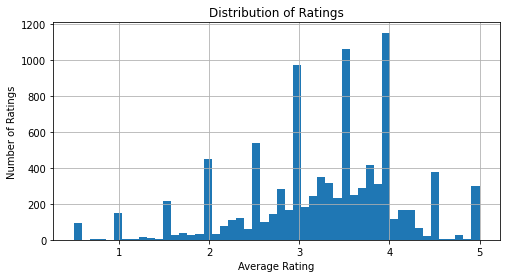

In [10]:
plt.figure(figsize=(8,4))
ratings['average rating'].hist(bins=50)
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings')
plt.show()

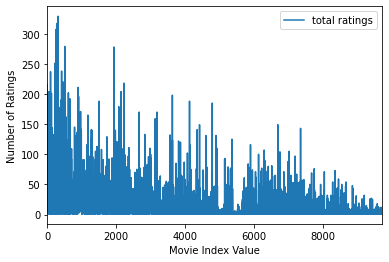

In [11]:
ratings[['title','total ratings']].plot(kind='line')
plt.xlabel('Movie Index Value')
plt.ylabel('Number of Ratings')
plt.show()

In [12]:
top_five = ratings.sort_values('total ratings', ascending=False)[:5]
print(top_five)

                                 title  average rating  total ratings
314                Forrest Gump (1994)        4.164134            329
277   Shawshank Redemption, The (1994)        4.429022            317
257                Pulp Fiction (1994)        4.197068            307
510   Silence of the Lambs, The (1991)        4.161290            279
1939                Matrix, The (1999)        4.192446            278


In [13]:
head(data, 10)

**whole table (below):** 100836 rows × 4 columns

,userId,rating,title,genres
0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [14]:
ratings_matrix = data.pivot_table(index='userId', columns='title', values='rating')
head(ratings_matrix, 20)

**whole table (below):** 610 rows × 9719 columns

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [14]:
#input_movie = 'Toy Story (1995)'
#input_movie = 'Jumanji (1995)'
#input_movie = 'Forrest Gump (1994)'
input_movie = 'Pulp Fiction (1994)'
correlations = ratings_matrix.corrwith(ratings_matrix[input_movie])
correlations.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                        -0.187323
'night Mother (1986)                            NaN
(500) Days of Summer (2009)               -0.044034
*batteries not included (1987)            -0.738549
dtype: float64

In [15]:
correlations.sort_values(ascending=False)

title
Coffee Town (2013)                                        1.0
Wolfman, The (2010)                                       1.0
Swiss Army Man (2016)                                     1.0
When in Rome (2010)                                       1.0
Tinker, Tailor, Soldier, Spy (1979)                       1.0
                                                         ... 
Zulu (2013)                                               NaN
[REC]² (2009)                                             NaN
[REC]³ 3 Génesis (2012)                                   NaN
anohana: The Flower We Saw That Day - The Movie (2013)    NaN
À nous la liberté (Freedom for Us) (1931)                 NaN
Length: 9719, dtype: float64

In [23]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = pd.merge(recommendation, ratings, on='title')
recommended = recommendation[recommendation['total ratings']>100].sort_values('Correlation',ascending=False).reset_index()
print(recommended.head(10))

   index                                              title  Correlation  \
0   3456                                Pulp Fiction (1994)     1.000000   
1   1487                                  Fight Club (1999)     0.543465   
2   2358                           Kill Bill: Vol. 1 (2003)     0.504147   
3   4462                               Trainspotting (1996)     0.437714   
4   2359                           Kill Bill: Vol. 2 (2004)     0.421685   
5   4572                         Usual Suspects, The (1995)     0.411700   
6    185  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...     0.402193   
7   1372       Eternal Sunshine of the Spotless Mind (2004)     0.401534   
8   3567                              Reservoir Dogs (1992)     0.394687   
9   4511          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)     0.391141   

   average rating  total ratings  
0        4.197068            307  
1        4.272936            218  
2        3.961832            131  
3        4.039216      

In [25]:
recommended = pd.merge(recommended, movies[['title','genres']], on='title')
recommended.head(6)

,index,title,Correlation,average rating,total ratings,genres
0,3456,Pulp Fiction (1994),1.000000,4.197068,307,Comedy|Crime|Drama|Thriller
1,1487,Fight Club (1999),0.543465,4.272936,218,Action|Crime|Drama|Thriller
2,2358,Kill Bill: Vol. 1 (2003),0.504147,3.961832,131,Action|Crime|Thriller
3,4462,Trainspotting (1996),0.437714,4.039216,102,Comedy|Crime|Drama
4,2359,Kill Bill: Vol. 2 (2004),0.421685,3.868182,110,Action|Drama|Thriller
5,4572,"Usual Suspects, The (1995)",0.411700,4.237745,204,Crime|Mystery|Thriller
